In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import random

In [3]:
# data_directory="/Users/poetofquality/Nutstore Files/Nutstore/Datasets/semi-conductor-image-classification-first/features"
# train_data_normal = pd.read_csv(data_directory+"/train_pretrained_resnet50_features_normal.csv", header = None)
# train_data = pd.read_csv(data_directory+"/train_resnet50_features.csv", header = None)
train_data = pd.read_csv("train_resnet50_features.csv", header = None)

In [6]:
sample_size = 1000
sample_ind = random.sample(range(0,train_data.shape[0]),sample_size);
# norm_ind = np.loadtxt(data_directory+"/norm_ind_1percent.csv")
norm_ind = np.loadtxt("norm_ind_1percent.csv")

In [7]:
y = np.array(train_data.iloc[sample_ind,1])
# bool_ind = [each not in norm_ind for each in sample_ind]
# y[bool_ind]=2
# y[y[bool_ind]==0]=2
# y[y[bool_ind]==1]=3
ydf = pd.DataFrame({'y': y})
x = np.array(train_data.iloc[sample_ind,2:])

In [8]:
pca = PCA(n_components=2)
# Xresult = pca.fit(X)  
xresult=pca.fit_transform(x)

In [9]:
print(pca.explained_variance_ratio_)  

[0.51913492 0.08988955]


In [10]:
principalDf = pd.DataFrame(data = xresult
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, ydf], axis = 1)

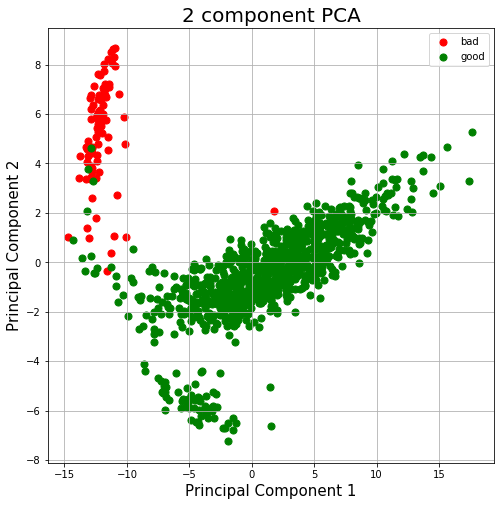

In [19]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = range(2)
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['y'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(('bad','good'))
ax.grid()
plt.savefig('PCA.png')

In [64]:
from sklearn.manifold import TSNE
tsne=TSNE()
xtsne=tsne.fit_transform(x)

In [65]:
tsneDf = pd.DataFrame(data = xtsne
             , columns = ['tsne_axis 1', 'tsne_axis 2'])
finaltsneDf = pd.concat([tsneDf, ydf], axis = 1)

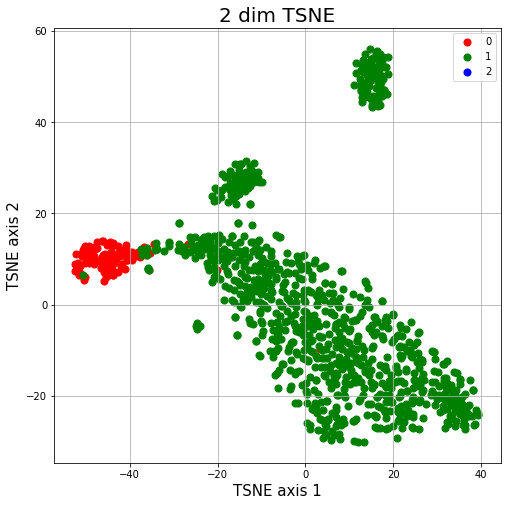

In [68]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('TSNE axis 1', fontsize = 15)
ax.set_ylabel('TSNE axis 2', fontsize = 15)
ax.set_title('2 dim TSNE', fontsize = 20)
targets = range(3)
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finaltsneDf['y'] == target
    ax.scatter(finaltsneDf.loc[indicesToKeep, 'tsne_axis 1']
               , finaltsneDf.loc[indicesToKeep, 'tsne_axis 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.savefig('tsne.png')